# Prerequisite Test


# Nishant Kumar

## 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

In a multiplication between a (n,k) and a (k,m) matrices:

The no. of multiplications will be "mnk" because to get an element of the final matrix, we need to do k multiplications for each element and add them together, and, since there are "mn" elements in the final matrix, there needs to be "mnk" multiplications.

Similar to the process, to achieve one element of the final matrix, we need to add k products which implies (k-1) additions. Since we have "mn" elements in the final matrix, the total number of additions are "mn(k-1)".

## 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [28]:
#2 matrices
n=int(input("Enter n:"))
k=int(input("Enter k:"))
m=int(input("Enter m:"))
M3=[]
M=[]

import numpy as np
M1=np.random.randint(10,size=(n,k))
M2=np.random.randint(10,size=(k,m))

import time
a=time.time()
#Using list of lists to compute matrix multiplication
for i in range(n):
    sum=0
    for l in range(m):
        for j in range(k):
            sum+=M1[i][j]*M2[j][l]
        M.append(sum)
        sum=0
    M3.append(M)
    M=[]
b=time.time()
print("Product by list of lists:")
for i in M3:
    print(i)
print("Time taken:",b-a)
    
#using numpy to do matrix multiplication
print("Product using numpy:")
c=time.time()
print(np.dot(M1,M2))
d=time.time()
print("Time Taken:",d-c)

Enter n:20
Enter k:30
Enter m:10
Product by list of lists:
[756, 701, 645, 519, 511, 640, 593, 679, 665, 641]
[703, 465, 596, 540, 471, 517, 517, 533, 553, 493]
[766, 658, 715, 536, 556, 654, 604, 685, 723, 633]
[707, 587, 692, 511, 503, 607, 617, 588, 647, 534]
[807, 745, 766, 655, 607, 705, 637, 717, 868, 653]
[734, 609, 623, 509, 518, 582, 582, 583, 614, 539]
[845, 665, 717, 661, 707, 649, 730, 750, 800, 676]
[758, 714, 718, 590, 565, 683, 531, 704, 783, 629]
[995, 817, 883, 721, 725, 808, 786, 766, 896, 692]
[932, 787, 876, 629, 653, 741, 718, 833, 860, 733]
[690, 602, 664, 462, 483, 529, 462, 658, 686, 563]
[775, 626, 609, 541, 618, 613, 618, 610, 657, 548]
[765, 792, 771, 627, 637, 734, 709, 710, 753, 652]
[818, 670, 726, 603, 678, 720, 638, 704, 766, 650]
[825, 744, 805, 592, 615, 727, 729, 721, 742, 678]
[787, 761, 754, 587, 637, 704, 681, 732, 797, 708]
[743, 712, 667, 612, 657, 675, 696, 677, 815, 612]
[768, 714, 643, 459, 520, 640, 627, 734, 653, 708]
[619, 574, 625, 425, 49

We can see that product of 2 matrices is faster using numpy than list of lists.
The reason behind this is that Python lists can store different datatypes and thus, need additional information to store them as its type and reference count whereas Numpy array stores elements of the same datatype. This increases memory efficiency for numpy and increases the speed of operations.

## 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Using the method given in the problem, if the array size is even, then we can find the median in (n/2)+1 passes and if the array size is odd, then it would require (n+1)/2 passes. A better method would be to just sort the list using merge sort as it would take the time complexity of "O(n(log n))" but the above method takes the time complexity of "O(n<sup>2</sup>)"

I used numpy to create an random array and then converted it to list so that i could use list functions like pop. For faster method, as I said, I would be using sorting algorithm first. I could directly use lst.sort() in python but I am sure this function does not do merge sort only, so I have written the algorithm of merge sort to use it.

In [84]:
import numpy as np
from numpy import random
import time
n=int(input("enter the length of list:"))
lst1=random.randint(10000,size=n)
lst=[]
max1=0
for i in lst1:
    lst.append(i)

# print("List:",lst)
temp=lst.copy()

t1=time.time()
print("Median:",np.median(lst))
t2=time.time()
print("Time taken by numpy:",t2-t1)

t1=time.time()
for j in range((n+1+(n+1)%2)//2):
    maxi=0
    for i in range(len(temp)):
        if maxi<temp[i]:
            maxi=temp[i]
    if j<n/2-1:
        temp.remove(maxi)
    elif j==n/2-1:
        max1=maxi
        temp.remove(maxi)
if n%2==1:
    print("Median:",maxi)
else:
    print("Median:",(maxi+max1)/2)
t2=time.time()
print("Time taken by this:",t2-t1)

def msort(lst):
    mid=len(lst)//2
    if len(lst)>1:
        left=lst[:mid]
        right=lst[mid:]
        msort(left)
        msort(right)
        i=0
        j=0
        k=0
        while i<len(left) and j<len(right):
            if left[i]<right[j]:
                lst[k]=left[i]
                i+=1
            else:
                lst[k]=right[j]
                j+=1
            k+=1
        while i<len(left):
            lst[k]=left[i]
            k+=1
            i+=1
        while j<len(right):
            lst[k]=right[j]
            j+=1
            k+=1

t1=time.time()
msort(lst)
if n%2==0:
    print("Median:",(lst[n//2]+lst[(n//2)+1])/2)
else:
    print("Median:",lst[(n+1)//2])
t2=time.time()
print("Time taken by sorting:",t2-t1)

enter the length of list:200
Median: 4560.5
Time taken by numpy: 0.0
Median: 4560.5
Time taken by this: 0.001018524169921875
Median: 4566.5
Time taken by sorting: 0.0


## 4. What is the gradient of the following function with respect to x and y? 
## x<sup>2</sup>y + y<sup>3</sup>sin(x)

The gradient of the x<sup>2</sup>y + y<sup>3</sup>sin(x) with respect to x is 2xy + y<sup>3</sup>cos(x)

The gradient of the x<sup>2</sup>y + y<sup>3</sup>sin(x) with respect to y is x<sup>2</sup> + 3y<sup>2</sup>sin(x)

## 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [2]:
import jax
import jax.numpy as np

def fun(x,y):
    return x*x*y + (y**3)*np.sin(x)

x=float(input("Enter the value of x:"))
y=float(input("Enter the value of y:"))

print("According to my method:")
print("Gradient wrt x:",2*x*y + (y**3)*np.cos(x))
print("Gradient wrt y:",x**2 + 3*(y*y)*np.sin(x))

print("According to JAX:")
j1=jax.grad(fun,(0,1))
jx, jy = j1(x, y)
print("Gradient wrt x:",jx)
print("Gradient wrt y:",jy)

Enter the value of x:2.5
Enter the value of y:3.1
According to my method:
Gradient wrt x: -8.366869
Gradient wrt y: 23.503952
According to JAX:
Gradient wrt x: -8.366867
Gradient wrt y: 23.50395


## 6. Use sympy to confirm that you obtain the same gradient analytically.

In [6]:
import sympy as sp

def fun(x,y):
    return x*x*y + (y**3)*sp.sin(x)

x=float(input("Enter the value of x:"))
y=float(input("Enter the value of y:"))

print("According to my method:")
print("Gradient wrt x:",2*x*y + (y**3)*sp.cos(x))
print("Gradient wrt y:",x**2 + 3*(y*y)*sp.sin(x))

print("According to sympy:")
xs, ys = sp.symbols('x y')
dx=sp.diff(fun(xs,ys),xs)
dy=sp.diff(fun(xs,ys),ys)
print("Gradient wrt x:",dx.subs([(xs, x), (ys, y)]))
print("Gradient wrt y:",dy.subs([(xs, x), (ys, y)]))

Enter the value of x:3.2
Enter the value of y:1.4
According to my method:
Gradient wrt x: 6.22067913521920
Gradient wrt y: 9.89676003664583
According to sympy:
Gradient wrt x: 6.22067913521920
Gradient wrt y: 9.89676003664583


## 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. 

In [39]:
import json
print("Welcome to your fantasy college.")

y=int(input("How many different year students present?"))
year=[2023-i for i in range(y)]
dy={}
for y in year:
    b=int(input(f"How many different branches do you need in year {y}?"))
    batch=[]
    for i in range(b):
        batch.append(input(f"Enter the name of branch {i+1}:"))
    db={}
    
    for b in batch:
        s=int(input(f"How many students in {b} batch?"))
        name=[]
        roll=[i+1 for i in range(s)]
        for i in range(s):
            name.append(input(f"Enter the name of student {i+1}:"))
        ds={}
        dstud={}
        
        for n in name:
            sub=int(input(f"Enter the number of subjects taken by {n}:"))
            sname=[]
            for i in range(sub):
                sname.append(input(f"Enter the subject {i+1} name:"))    
            e=int(input("How many exams?"))
            dm={}
            de={}
            for i in range(e):
                for j in sname:
                    dm[j]=int(input(f"Enter the marks {n} got in {j} in exam {i+1}:"))
                de[f"Exam {i+1}"]=dm
                dm={}
            ds["Name"]=n
            ds["Roll No."]=roll[name.index(n)]
            ds["Marks"]=de
            de={}
            dstud[f"Stud. {name.index(n)+1}"]=ds
            ds={}
            
        db[b]=dstud
    dy[y]=db

print(json.dumps(dy,indent=4))

Welcome to your fantasy college.
How many different year students present?1
How many different branches do you need in year 2023?2
Enter the name of branch 1:CS
Enter the name of branch 2:Elec
How many students in CS batch?1
Enter the name of student 1:Pratham
Enter the number of subjects taken by Pratham:2
Enter the subject 1 name:DSA
Enter the subject 2 name:AA
How many exams?1
Enter the marks Pratham got in DSA in exam 1:10
Enter the marks Pratham got in AA in exam 1:20
How many students in Elec batch?1
Enter the name of student 1:Mumuksh
Enter the number of subjects taken by Mumuksh:2
Enter the subject 1 name:SSRP
Enter the subject 2 name:Control Sys
How many exams?2
Enter the marks Mumuksh got in SSRP in exam 1:90
Enter the marks Mumuksh got in Control Sys in exam 1:100
Enter the marks Mumuksh got in SSRP in exam 2:95
Enter the marks Mumuksh got in Control Sys in exam 2:99
{
    "2023": {
        "CS": {
            "Stud. 1": {
                "Name": "Pratham",
                "

## 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [45]:
class Year:
    def __init__(self,year):
        self.year=year
        self.branches=[]

    def b_add(self,branch):
        self.branches.append(branch)

class Branch:
    def __init__(self,name):
        self.name=name
        self.students=[]

    def s_add(self,student):
        self.students.append(student)

class Student:
    def __init__(self,name,roll,marks):
        self.name=name
        self.roll=roll
        self.marks=marks
        
s1=Student("A","1",{"Math":90,"English":85,"Science":92})
s2=Student("B","2",{"Math":88,"English":78,"Science":95})

b1=Branch("CS")
b1.s_add(s1)
b1.s_add(s2)

b2=Branch("Electrical")
b2.s_add(Student("C","1",{"Math":75,"English":80,"Science":88}))

y1=Year(2023)
y1.b_add(b1)
y1.b_add(b2)

y2=Year(2024)
y2.b_add(Branch("Mech"))
y2.b_add(Branch("Civil"))

db=[y1,y2]
for year in db:
    print(f"Year:{year.year}")
    for branch in year.branches:
        print(f"  Branch:{branch.name}")
        for student in branch.students:
            print(f"    Student:{student.name}, Roll Number:{student.roll}")
            print(f"      Marks:{student.marks}")
        print()
    print()


Year:2023
  Branch:CS
    Student:A, Roll Number:1
      Marks:{'Math': 90, 'English': 85, 'Science': 92}
    Student:B, Roll Number:2
      Marks:{'Math': 88, 'English': 78, 'Science': 95}

  Branch:Electrical
    Student:C, Roll Number:1
      Marks:{'Math': 75, 'English': 80, 'Science': 88}


Year:2024
  Branch:Mech

  Branch:Civil




## 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
## i. y=x
## ii. y=x<sup>2</sup>
## iii. y=x<sup>3</sup>/100
## iv. y=sin(x)
## v. y=sin(x)/x
## vi. y=log(x)
## vii. y=e<sup>x</sup>

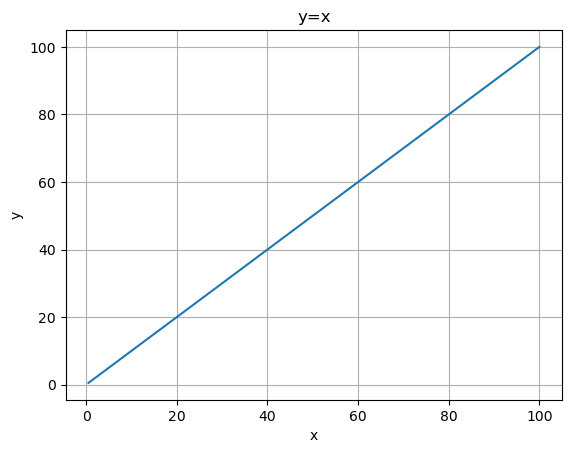

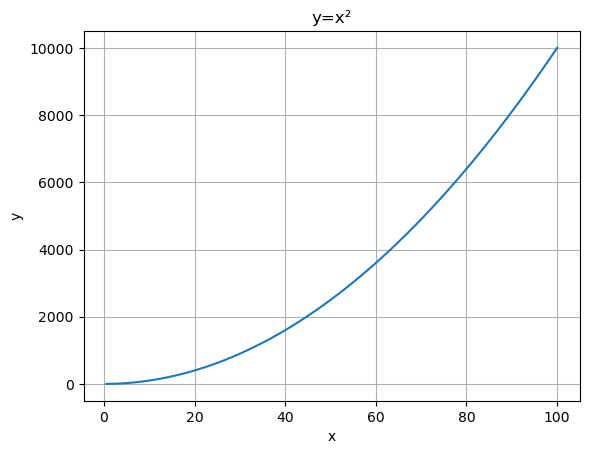

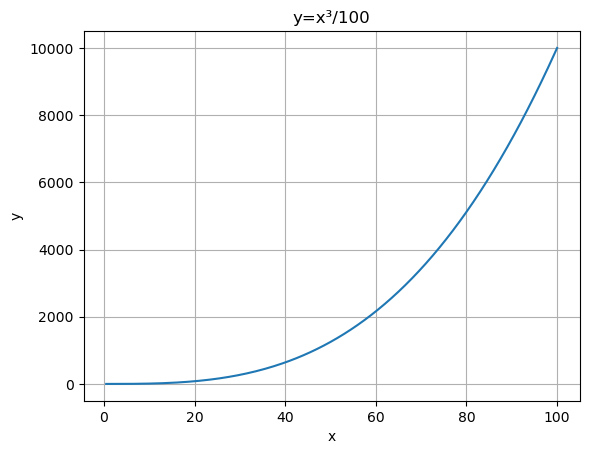

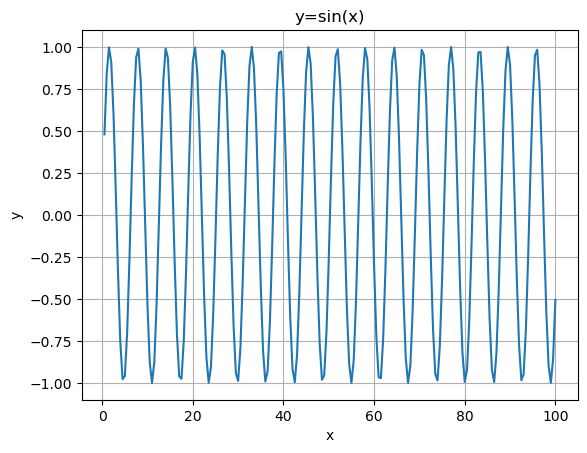

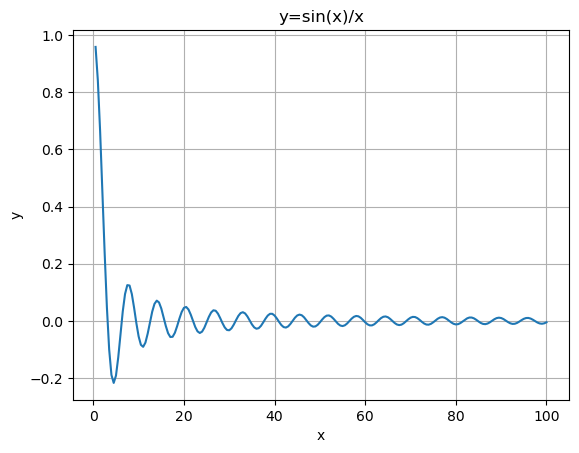

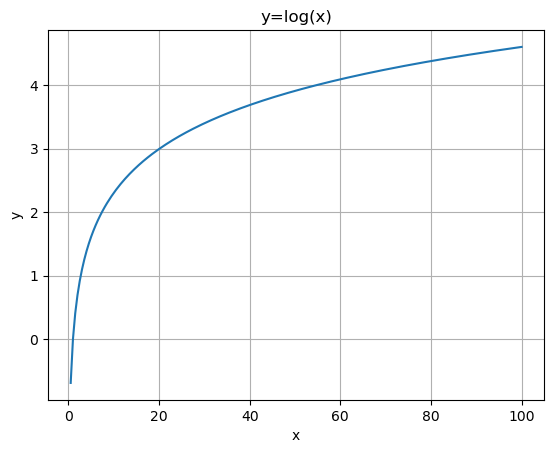

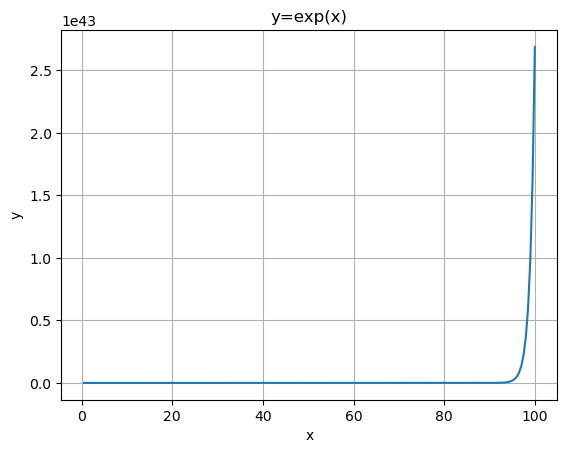

In [15]:
import math
import matplotlib.pyplot as plt
x=np.linspace(0.5, 100, 200)

y1=[i for i in x]
plt.plot(x,y1)
plt.title("y=x")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

y2=[i*i for i in x]
plt.plot(x,y2)
plt.title("y=x²")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


y3=[(i**3)/100 for i in x]
plt.plot(x,y3)
plt.title("y=x³/100")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

y4=[math.sin(i) for i in x]
plt.plot(x,y4)
plt.title("y=sin(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

y5=[math.sin(i)/i for i in x]
plt.plot(x,y5)
plt.title("y=sin(x)/x")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

y6=[math.log(i) for i in x]
plt.plot(x,y6)
plt.title("y=log(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

y4=[math.exp(i) for i in x]
plt.plot(x,y4)
plt.title("y=exp(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


## 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [19]:
import numpy as np
import pandas as pd
M=np.random.uniform(1,2,size=(20,5))
df=pd.DataFrame(M,columns=["a","b","c","d","e"])
sd=0
m=2
ind=0
arr=["a","b","c","d","e"]
for i in arr:
    if sd<df[i].std():
        sd=df[i].std()
        ind=i
print("Column with highest standard deviation:",ind)
for i in range(20):
    if m>df.iloc[i].mean():
        m=df.iloc[i].mean()
        ind=i
print("Row with lowest mean:",ind)

Column with highest standard deviation: a
Row with lowest mean: 14
Column with highest standard deviation: a
Row with lowest mean: 14


## 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [23]:
import numpy as np
import pandas as pd
M=np.random.uniform(1,2,size=(20,5))
df=pd.DataFrame(M,columns=["a","b","c","d","e"])
arr=["a","b","c","d","e"]
sum=0
F=[]
G=[]
for i in range(20):
    for j in arr:
        sum+=df.loc[i,j]
    F.append(sum)
    if sum>=8:
        G.append("GT8")
    else:
        G.append("LT8")
    sum=0
df["f"]=F
df["g"]=G

l=[]
g=[]
c=0
for i in range(20):
    if df.loc[i,"g"]=="LT8":
        c+=1
        l.append(df.loc[i,"f"])
    else:
        g.append(df.loc[i,"f"])

print("Dataframe: \n",df)
print("No. of rows with sum less than 8:",c)
print("Standard Deviation of LT8:",np.std(l))
print("Standard Deviation of GT8:",np.std(g))

Dataframe: 
            a         b         c         d         e         f    g
0   1.703308  1.551886  1.234611  1.830590  1.187453  7.507848  LT8
1   1.503338  1.145075  1.122974  1.058777  1.482842  6.313005  LT8
2   1.905182  1.972350  1.867369  1.657852  1.549198  8.951951  GT8
3   1.313952  1.985499  1.742009  1.886693  1.566588  8.494740  GT8
4   1.663049  1.604786  1.116216  1.933733  1.052046  7.369831  LT8
5   1.523319  1.846537  1.468542  1.523110  1.950061  8.311570  GT8
6   1.754436  1.344764  1.638838  1.510149  1.826927  8.075113  GT8
7   1.336399  1.332858  1.953690  1.453797  1.973174  8.049918  GT8
8   1.315287  1.802637  1.649159  1.238722  1.626933  7.632737  LT8
9   1.893389  1.638269  1.302619  1.301989  1.387463  7.523729  LT8
10  1.653011  1.784907  1.955030  1.443657  1.890259  8.726865  GT8
11  1.243926  1.780164  1.777547  1.588966  1.892851  8.283455  GT8
12  1.368208  1.878806  1.089804  1.171380  1.181744  6.689941  LT8
13  1.359693  1.758857  1.532160  1

## 12. Write a small piece of code to explain broadcasting in numpy.

In [25]:
import numpy as np
arr=np.array([[1, 2, 3],
                   [4, 5, 6]])
s=10
res=arr+s
print("Original Array: \n",arr)
print("Scalar Value:",s)
print("Result after Broadcasting:\n",res)


Original Array: 
 [[1 2 3]
 [4 5 6]]
Scalar Value: 10
Result after Broadcasting:
 [[11 12 13]
 [14 15 16]]


Broadcasting is a feature in NumPy that allows us to operate on arrays of different sizes and shapes. It adjusts dimensions of smaller arrays to make it possible to operate with large arrays.

In the example, I added a scalar value to a 2x3 array and we can see that brodacasting has occured as scalar value was converted into a 2x3 array where each element had the same value and thus, every element of the initial array was added by the scalar value

For 2 arrays to be compatible for broadcasting, the size of each dimension must either be the same or one of them must be one.

## 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [30]:
import numpy as np
n=int(input("Enter no. of elements:"))
arr=np.random.randint(n+100,size=n)

def fun(arr):
    min=n+101
    for i in range(len(arr)):
        if min>arr[i]:
            min=arr[i]
            ind=i
    return ind

print("Array:\n",arr)
print("Argmin of the numpy array is:",fun(arr))
print("Using numpy, argmin:",np.argmin(arr))

Enter no. of elements:45
Array:
 [ 72 132 114  61 117  47  85 126  47   6  80 139  59  63  36  91  97  20
  37   5   8  84   8 131   2  77 116  96 105 109 114   4 140 125  66 102
  44 141 104 113  31  54  37 113 129]
Argmin of the numpy array is: 24
Using numpy, argmin: 24
